<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/DEMO_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_Linear_LASSO_Ridge_ElasticNet_21_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error


# Функции, которые используются в ноутбуке

In [ ]:
# функция для изучения данных
def total_describe(data, info=True, describe=True, head=True):
    if info:
        print('Общая информация:')
        print()
        print(data.info())
        print('____________________________________________________________________')
        print()
    if describe:
        print('Описание числовых значений:')
        print()
        print(data.describe(include='all'))
        print('____________________________________________________________________')
        print()
    if head:
        print('Первые несколько строк:')
        return(data.head())

# 1 способ создания данных

In [ ]:

# Устанавливаем seed для воспроизводимости
np.random.seed(42)
n = 100
noise = 3*np.random.uniform(n)
x11 = np.random.normal(loc=100000, scale=1000.0, size=n)
x12 = np.random.power(2)
# x13 = np.random.normal(loc=0.0, scale=1.0, size=n)
# x14 = np.random.normal(loc=0.0, scale=1.0, size=n)

x2 = 2 * x11 + np.random.rand(n)
# x3 = np.random.rand(n)
# x4 = np.random.rand(n)
# x5 = np.random.rand(n)
# x3 = 3 * x12 + np.random.rand(n) * 0.1
# x4 = 4 * x3 + np.random.rand(n) * 0.1
# x5 = 6 * x14 + np.random.rand(n) * 0.1

# Целевая переменная y зависит от x1 и x2 с добавлением случайного шума
# y = 3 * x11 + 5 * x12 + x13 + x14 + noise
y = 3 * x11 + x2 + x12 + noise


# Создание DataFrame из данных
df = pd.DataFrame({'x11': x11,
                  #  'x12': x2, 'x13':x13, 'x14':x14,
                   'x2':x2,
                  #  'x3':x3, 'x4':x4, 'x5':x5,
                   'y': y
                   })

# Вывод первых пяти строк данных
df.head()

,x11,x2,y
0,98888.119882,197776.603394,494630.563086
1,100318.902185,200638.776151,501785.082752
2,100279.041292,200559.045032,501585.768955
3,101010.515285,202021.282352,505242.428253
4,99419.121866,198838.740980,497285.706625


# 2 способ создания данных

In [ ]:
# генерируем данные для X и y
N = 1
X, y = make_regression(n_samples=10000,n_features = N, noise=100, random_state=0)
# Create a DataFrame from the X array
list_features=['feature'+str(i) for i in range(1, N+1)]

df = pd.DataFrame(X, columns=list_features)
df['feature_new'] = df['feature1'].map(lambda x: x*2+np.random.rand())
df.head()

,feature1,feature_new
0,0.582624,1.810721
1,-1.310930,-2.444750
2,-0.762516,-0.584574
3,0.177450,1.308829
4,-1.306872,-1.698879


# Подготовка данных

In [ ]:
features = list(df.columns)
target = 'y'
try:
  features.remove(target)
except Exception as e:
  print(e)

list.remove(x): x not in list


In [ ]:
X = df[features]
try:
  y = df[target]
except Exception as e:
  print(e)

'y'


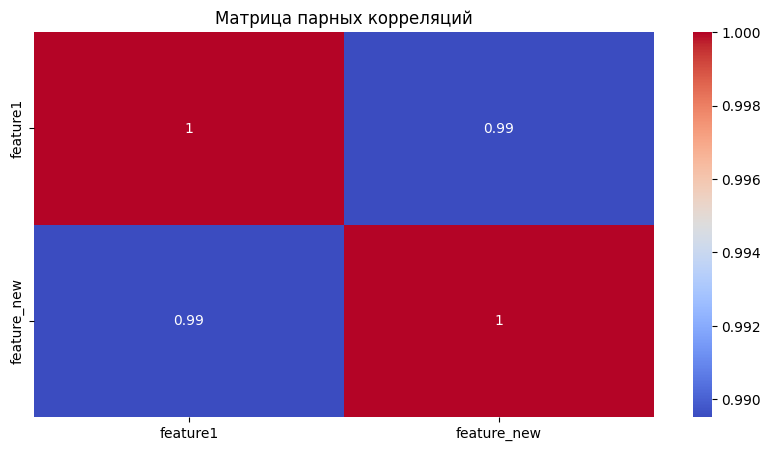

In [ ]:
# Расчет матрицы парных корреляций

correlation_matrix = X.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [ ]:
# разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Нормализация признаков для лучшей сходимости. Рассказать про важность нормализации именно для регуляризации
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# задаем интервал перебора для alpha
# альфа зависит от размера выборки

start = 0.0      # Начальное значение диапазона
stop = 1000       # Конечное значение диапазона (не включается в результат)
step = 10       # Шаг между значениями
float_range = np.arange(start, stop, step)
print(float_range)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410.
 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550.
 560. 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690.
 700. 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830.
 840. 850. 860. 870. 880. 890. 900. 910. 920. 930. 940. 950. 960. 970.
 980. 990.]


# RIDGE  регрессия

In [ ]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []
for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Ridge(alpha=alpha, max_iter=1000) # alpha — величина регуляризации
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  # mae = mean_absolute_error(y_test, y_pred_test )
  # mae_list.append(mae)
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  # R_2_score = model.score(X_test, y_test)
  # R_2_scores.append(R_2_score)
  # print("R^2 score on test data:", score)

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  # avg_coefficient = np.mean(coefficients)
  avg_coefficients.append(coefficients)
  # print("Coefficients (weights) with L1 regularization:")
  # print(coefficients)


In [ ]:
avg_coefficients = np.transpose(avg_coefficients)

In [ ]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))


fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 100, где достигается наименьшая ошибка

# LASSO  регрессия

In [ ]:
start = 0.0      # Начальное значение диапазона
stop = 0.2     # Конечное значение диапазона (не включается в результат)
step = 0.001       # Шаг между значениями

float_range = np.arange(start, stop, step)


In [ ]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []

# Нормализация признаков для лучшей сходимости.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Lasso(alpha=alpha, max_iter=1000)
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  # mae = mean_absolute_error(y_test, y_pred_test )
  # mae_list.append(mae)
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  # R_2_score = model.score(X_test, y_test)
  # R_2_scores.append(R_2_score)
  # print("R^2 score on test data:", score)

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  # avg_coefficient = np.mean(coefficients)
  avg_coefficients.append(coefficients)
  # print("Coefficients (weights) with L1 regularization:")
  # print(coefficients)
avg_coefficients = np.transpose(avg_coefficients)


In [ ]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))
fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 0.022, где достигается наименьшая ошибка

# Сравним как работает линейная регрессия и регрессии с регуляризацией для оптимального значения параметра регуляризации

In [ ]:
# построим линейную регрессию
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [ ]:
model.intercept_

-1.2639155750313074

In [ ]:
mse_test, mse_train

(10352.796558578046, 9869.831044131317)

In [ ]:
coefficients

array([17.33709591, -9.49443609])

мы получили модель y = -1.2639155750313078 + 17.33709591 * feature1 - 9.49443609 * feature_new

В данных наблюдается мультиколлинеарность, возможно по этой причине коэффициенты слишком высокие


Проведем регуляризацию L1 и L2






In [ ]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Lasso(alpha=0.022, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [ ]:
mse_test, mse_train

(10350.822900778769, 9869.924541536508)

In [ ]:
model.intercept_

-1.2639155750313074

In [ ]:
coefficients

array([15.22716383, -7.38466216])

ТО есть мы получили модель y = -1.2639155750313078 + 0 * feature1 + 8.04766423 * feature_new

y = -1.2639155750313078 + 8.04766423 * feature_new

In [ ]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Ridge(alpha=100, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [ ]:
mse_test, mse_train

(10346.732920637538, 9871.089787382929)

In [ ]:
model.intercept_

-1.2639155750313074

In [ ]:
coefficients

array([ 9.5772807 , -1.79053409])

ТО есть мы получили модель y = -1.2639155750313078 + 1.42333813 * feature1 + 6.56739487 * feature_new

Модель с регуляризацией L1 занулила коэффициент при feature1, модель с L2 регуляризацией снизила коэффициент